In [ ]:
import pandas as pd
from faker import Faker

In [ ]:
fake = Faker('ko_KR') # 페이커 객체

In [ ]:
# CSV 파일 : Comma Separate Value
# 엑셀에서 볼수 있는 텍스트 형식의 파일
# 콤마를 구분자로 하여 데이터를 표현해주는 파일

In [ ]:
csvList = [] # csv 파일로 저장할 리스트 데이터
columns01 = ['아이디', '이름', '주소', '전화번호', '이메일'] # 컬럼 이름
myencoding = 'UTF-8' # 'CP949' 'UTF-8' 인코딩 문자열

In [ ]:
for idx in range(10):
    onerow = [] # csv에 저장될 한건의 데이터
    onerow.append(fake.user_name())
    onerow.append(fake.name())
    onerow.append(fake.address())
    onerow.append(fake.phone_number())
    onerow.append(fake.email())

    csvList.append(onerow) # 1줄 추가
# end for

In [ ]:
print(csvList)

In [ ]:
myframe01 = pd.DataFrame(csvList, columns=columns01)
print('데이터 프레임 내용 확인')
myframe01

In [ ]:
dataIn = './../dataIn/' # 읽어 들일 파일이 저장되어 있는 폴더(디렉토리)
dataOut = './../dataOut/' # 결과 값을 저장할 폴더(디렉토리)

In [ ]:
filename = dataIn + 'result01.csv'
myframe01.to_csv(filename, encoding=myencoding, index=False, mode='w')

In [ ]:
# 파일 읽어 오기
yourframe = pd.read_csv(filename, encoding=myencoding)
print(type(yourframe))
yourframe

In [ ]:
myencoding = 'CP949'

In [ ]:
filename = dataIn + 'payment01.csv'
payment = pd.read_csv(filename, encoding=myencoding)
print('데이터 프레임 확인')
payment

In [ ]:
print('행 색인 정보 확인')
print(payment.index)

In [ ]:
print('열 색인 정보 확인')
print(payment.columns)

In [ ]:
business = payment['출장지역']
business

In [ ]:
print('출장 지역 빈도수 확인')
business.value_counts()

In [ ]:
paytravel = payment['교통비']
type(paytravel)

In [ ]:
print(f'시리즈 요소 갯수 확인 : {paytravel.size}')
print(f'형상 확인 : {paytravel.shape}')
print(f'전체 요소 갯수 : {len(paytravel)}')
print(f'카운트(결측치 제외) : {paytravel.count()}')
print(f'시리즈 타입 확인 : {paytravel.dtype}')
print(f'누락된 데이터가 있나요?  {paytravel.hasnans}')
print(f'모든 항목이 유일(unique)하나요?  {paytravel.is_unique}')

In [ ]:
business = payment['출장기간']
business

In [ ]:
print(f'사분위수 : {business.quantile()}') # 기본값 q=0.5(50%에 해당하는 값)
print(f'최소값 : {business.min()}')
print(f'최대값 : {business.max()}')
print(f'평균 : {business.mean()}')
print(f'중앙값 : {business.median()}')
print(f'표준 편차 : {business.std()}')
print(f'총합 : {business.sum()}')

In [ ]:
payment

In [ ]:
# '사원명' 컬럼을 행 색인으로 옮기기
payment = payment.set_index('사원명')
payment

In [ ]:
renamed_row = {'장도윤':'장태경', '선우재민':'선우은경'}
renamed_col = {'출장지역':'다녀온 곳', '식비':'밥값'}

In [ ]:
payment = payment.rename(index=renamed_row, columns=renamed_col)
payment

In [ ]:
filename = dataIn + 'payment01.csv'
# index_col='사원명' 옵션은 파일 읽어 들일 때 바로 행색인으로 옮기는 옵션
payment = pd.read_csv(filename, encoding=myencoding, index_col='사원명')
payment

In [ ]:
payment['차량 지원'] = '지원'
payment

In [ ]:
payment['최종 식비'] = payment['식비'] + 100
payment

In [ ]:
result = payment.drop('신승현', axis='index')
result

In [ ]:
result = payment.drop(['장도윤', '선우재민'], axis='index')
result

In [ ]:
result = payment.drop('출장기간', axis='columns')
result

In [ ]:
result = payment.drop(['차량 지원', '부서'], axis='columns')
result

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [ ]:
chartdata01 = payment['식비']
chartdata01

Text(0.5, 1.0, '식비 지급율')

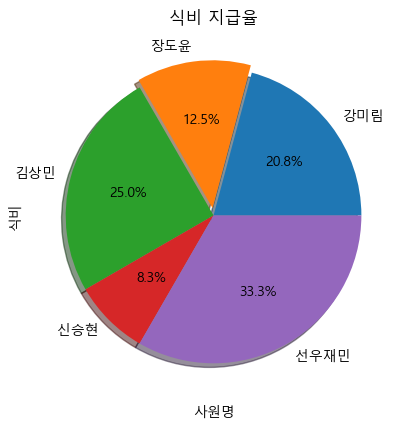

In [99]:
chartdata01.plot(kind='pie', shadow=True, explode=(0, 0.05, 0, 0, 0), autopct='%1.1f%%')
plt.xlabel(chartdata01.index.name)
plt.title(f'{chartdata01.name} 지급율')